In this assignment you will build models to predict quality of wines.  Please review the data dictionary and data provenance here:

https://archive.ics.uci.edu/ml/datasets/wine+quality

The target variable has been recoded as 1 (quality > 6) and 0 (quality < 7)

1. Load the data
2. Explore the distribution of the target variable
3. Assess if there are any missing values
4. Explore the information value and distribution of features using the pairplot



In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn import tree

In [ ]:
# Upload the Data

from google.colab import files
uploaded = files.upload()

import io
data = pd.read_csv(io.BytesIO(uploaded['whitewine-classification.csv']))

Saving whitewine-classification.csv to whitewine-classification.csv


In [ ]:
data.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  goodwine  
0      8.8         0  
1      9.5         0  
2     10.1         0  
3      9.9         0  
4      9.9         0

<Axes: >

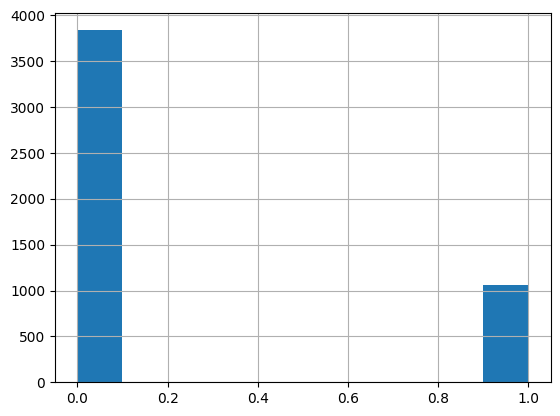

In [ ]:
#Disturbution of Target Variable
#Columm Named goodwine is the target
data.goodwine.hist()

<Axes: >

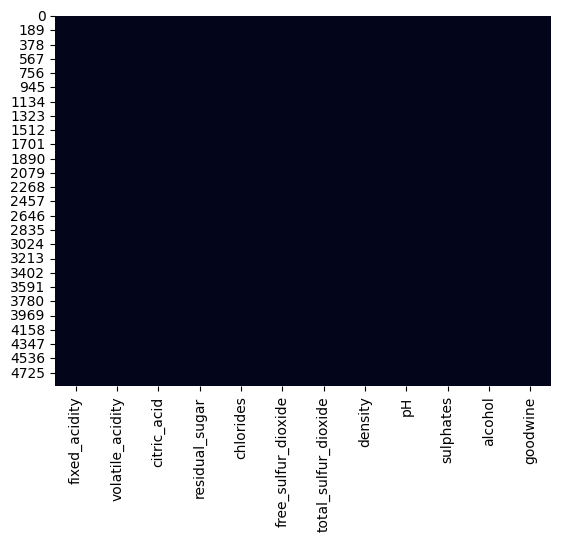

In [ ]:
#Checking Missing Values
sns.heatmap(data.isnull(), cbar=False)

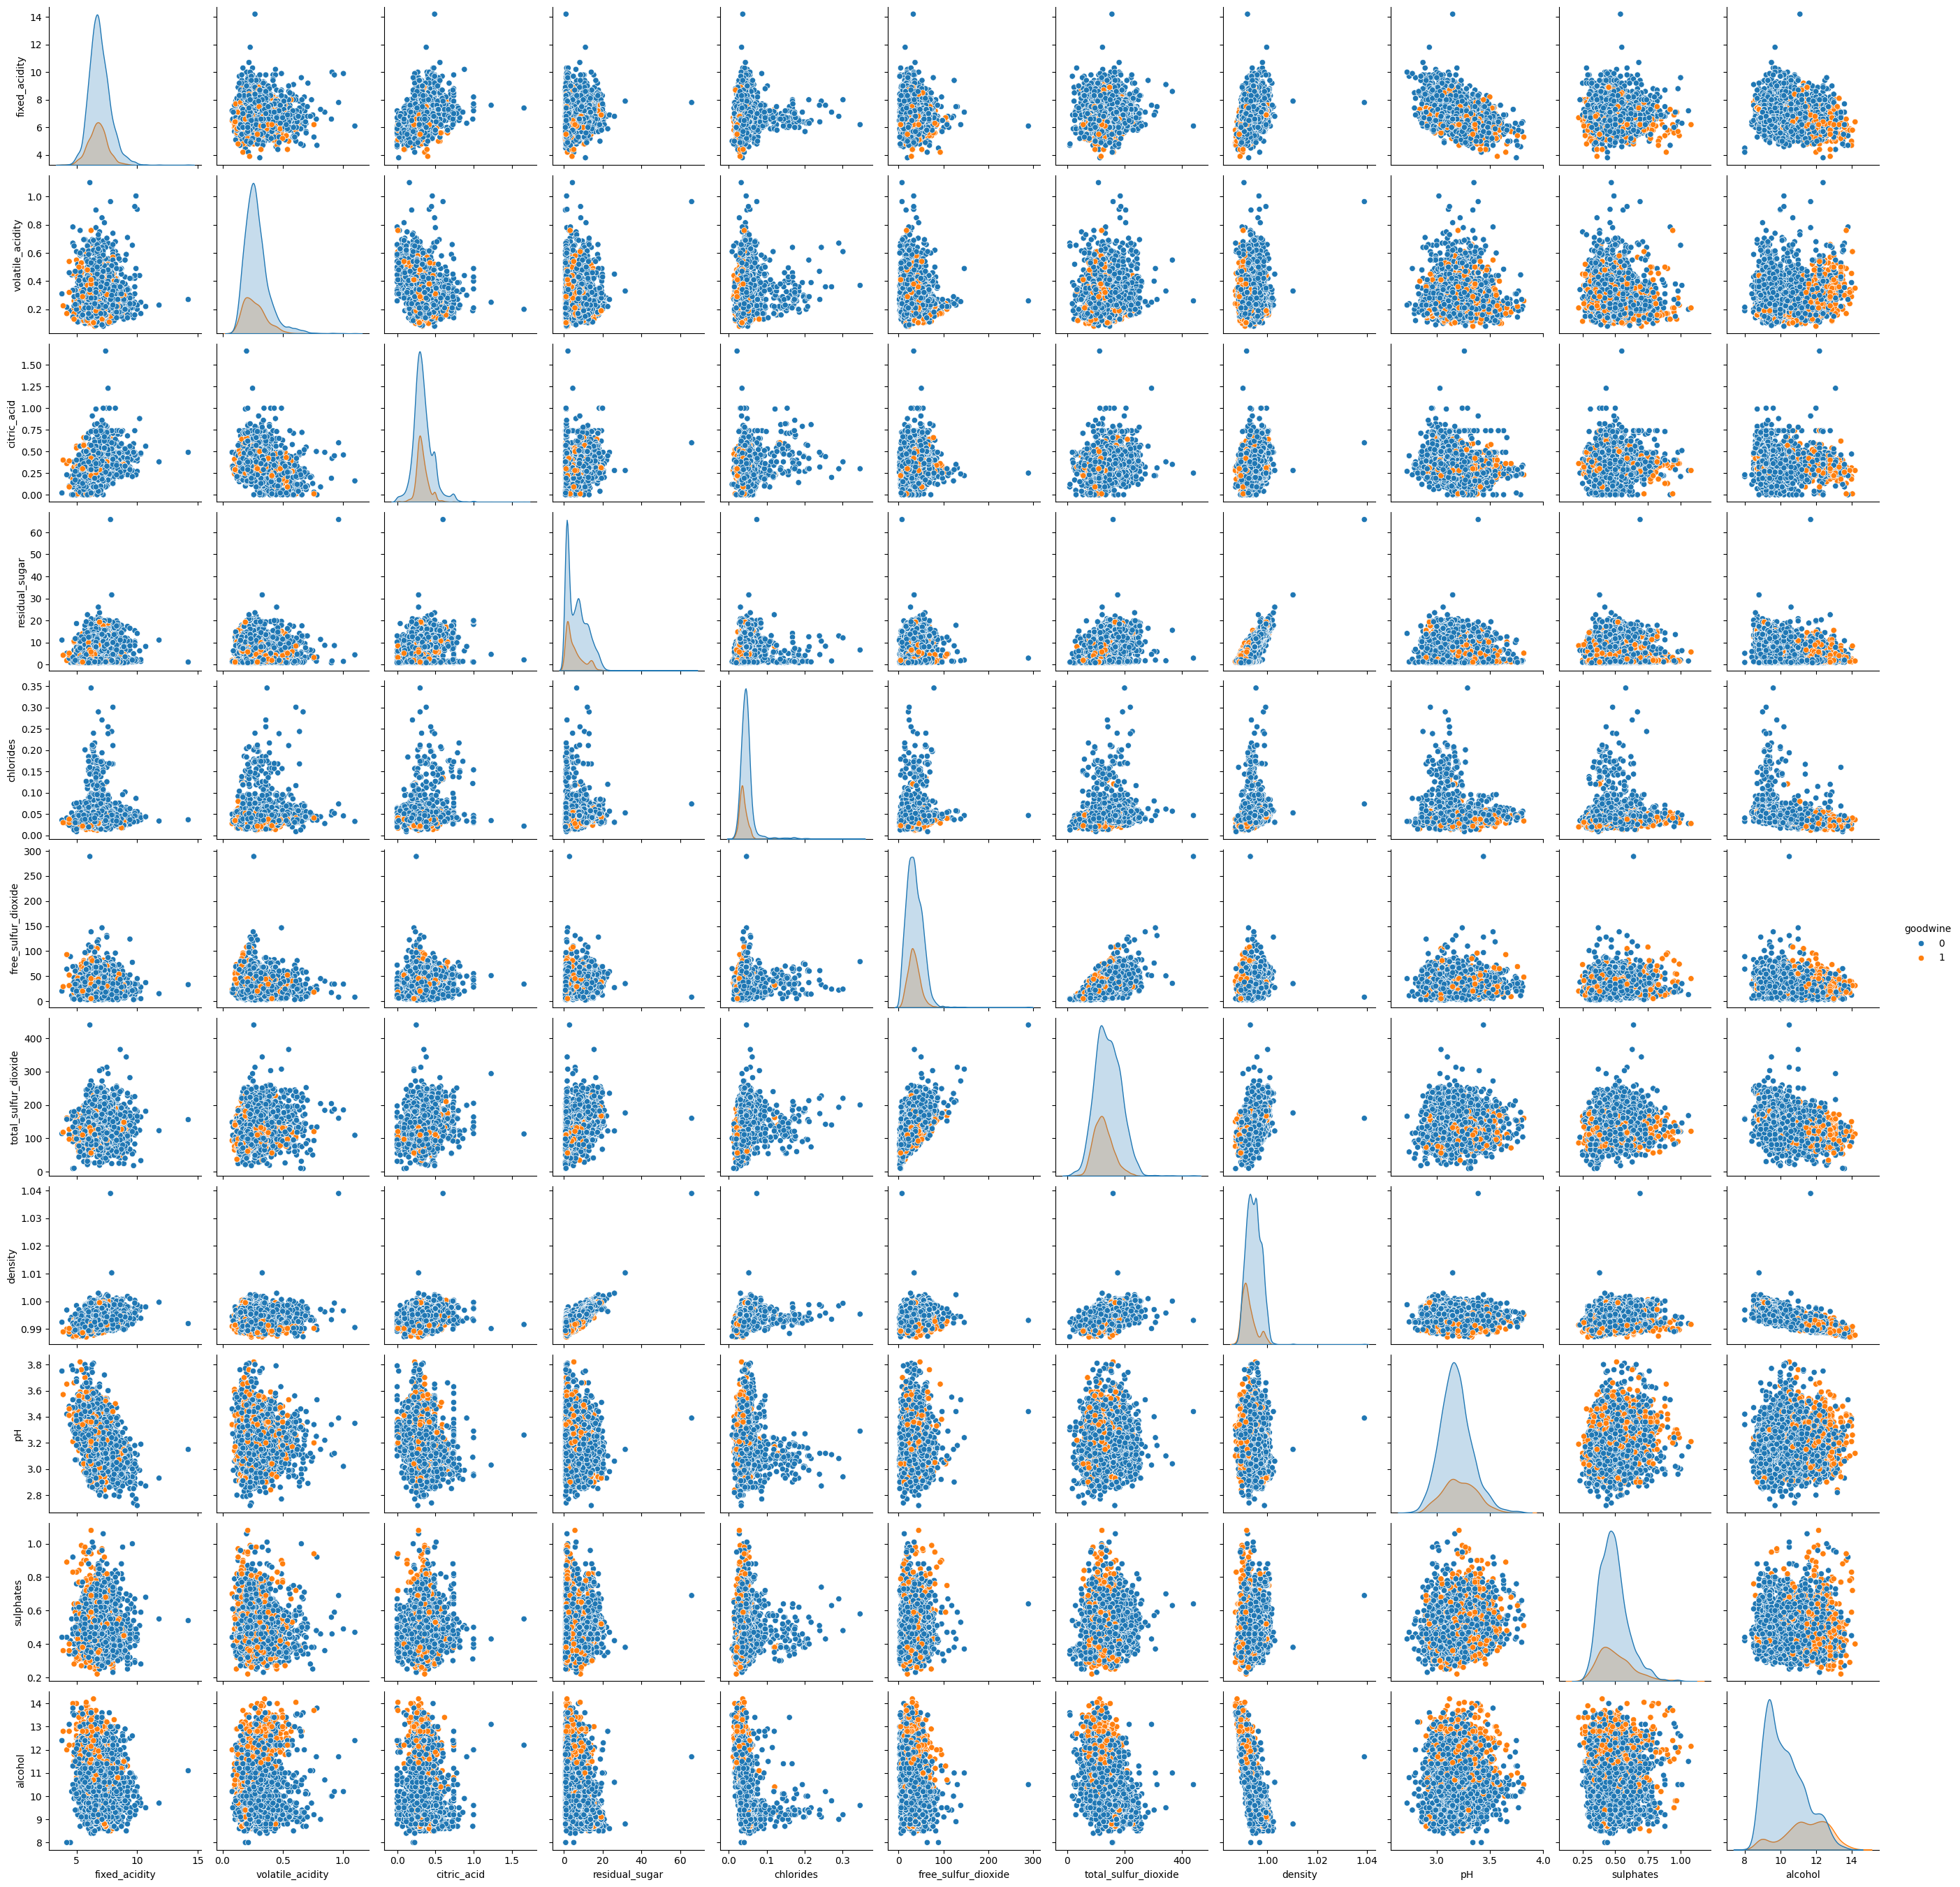

In [ ]:
#Check the disturbition by using pariplot
sns.pairplot(data, hue = 'goodwine')

In [ ]:
data.describe()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol     goodwine  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     0.216415  
std       0.151001     0.114126     1.230621     0.411842  
min       2.720000     0.220000     8.000000     0.000000  
25%       3.090000     0.410000     9.500000     0.000000  
50%       3.180000     0.470000    10.400000     0.000000  
75%       3.280000     0.550000    11.400000     0.000000  
max       3.820000     1.080000    14.200000     1.000000

In [ ]:
data = data.drop(['free_sulfur_dioxide','residual_sugar'],axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   chlorides             4898 non-null   float64
 4   total_sulfur_dioxide  4898 non-null   float64
 5   density               4898 non-null   float64
 6   pH                    4898 non-null   float64
 7   sulphates             4898 non-null   float64
 8   alcohol               4898 non-null   float64
 9   goodwine              4898 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 382.8 KB


In [ ]:
#Replacing missing values and redescribe the data
data['goodwine'].fillna(999, inplace=True)
data.describe()

fixed_acidity  volatile_acidity  citric_acid    chlorides  \
count    4898.000000       4898.000000  4898.000000  4898.000000   
mean        6.854788          0.278241     0.334192     0.045772   
std         0.843868          0.100795     0.121020     0.021848   
min         3.800000          0.080000     0.000000     0.009000   
25%         6.300000          0.210000     0.270000     0.036000   
50%         6.800000          0.260000     0.320000     0.043000   
75%         7.300000          0.320000     0.390000     0.050000   
max        14.200000          1.100000     1.660000     0.346000   

       total_sulfur_dioxide      density           pH    sulphates  \
count           4898.000000  4898.000000  4898.000000  4898.000000   
mean             138.360657     0.994027     3.188267     0.489847   
std               42.498065     0.002991     0.151001     0.114126   
min                9.000000     0.987110     2.720000     0.220000   
25%              108.000000     0.991723     3.090000     0.410000   
50%              134.000000     0.993740     3.180000     0.470000   
75%              167.000000     0.996100     3.280000     0.550000   
max              440.000000     1.038980     3.820000     1.080000   

           alcohol     goodwine  
count  4898.000000  4898.000000  
mean     10.514267     0.216415  
std       1.230621     0.411842  
min       8.000000     0.000000  
25%       9.500000     0.000000  
50%      10.400000     0.000000  
75%      11.400000     0.000000  
max      14.200000     1.000000

5. Develop logistic regression, kNN (optimize k), random forest and boosted tree models to predict wine quality. Make sure to preprocess the data as needed by the respective models.

6. Assess the performance of each model using the following metrics: Recall, Precision, F1, ROC AUC.  Which is the best model based on ROC AUC?



In [ ]:
#Logistic Regression
data = pd.get_dummies(data, drop_first=True)
X = data.drop('goodwine', axis=1)
y = data['goodwine']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
logmodel = LogisticRegression(solver='liblinear')

logmodel.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [ ]:
y_pred = logmodel.predict(X_test)

In [ ]:
confusion_matrix(y_test,y_pred)

array([[1087,   49],
       [ 258,   76]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88      1136
           1       0.61      0.23      0.33       334

    accuracy                           0.79      1470
   macro avg       0.71      0.59      0.60      1470
weighted avg       0.76      0.79      0.75      1470



In [ ]:
logmodel.coef_

array([[-1.75707677e-01, -2.74763614e+00, -5.71984952e-01,
        -1.30957700e+00, -1.64627445e-05, -2.96851532e+00,
        -5.33469997e-01,  8.58865027e-01,  7.54269629e-01]])

In [ ]:
import statsmodels.api as sm

bool_cols = X_train.select_dtypes(include='bool').columns
for col in bool_cols:
  X_train[col]=X_train[col].astype(int)


logit_model=sm.Logit(y_train, X_train)
logmodel_2=logit_model.fit()
print(logmodel_2.summary2())

Optimization terminated successfully.
         Current function value: 0.430513
         Iterations 7
                            Results: Logit
Model:                 Logit             Method:            MLE        
Dependent Variable:    goodwine          Pseudo R-squared:  0.166      
Date:                  2024-09-29 16:52  AIC:               2969.5966  
No. Observations:      3428              BIC:               3024.8542  
Df Model:              8                 Log-Likelihood:    -1475.8    
Df Residuals:          3419              LL-Null:           -1769.9    
Converged:             1.0000            LLR p-value:       7.8850e-122
No. Iterations:        7.0000            Scale:             1.0000     
-----------------------------------------------------------------------
                      Coef.   Std.Err.    z    P>|z|   [0.025   0.975] 
-----------------------------------------------------------------------
fixed_acidity          0.0191   0.0659  0.2894 0.7723  -0.1100 

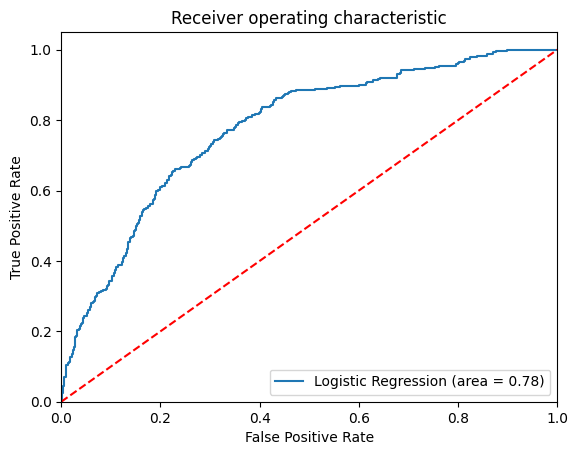

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

logit_roc_auc = roc_auc_score(y_test, logmodel.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
print('ROC AUC: ', roc_auc_score(y_test,y_pred))

ROC AUC:  0.5922055536813697


In [ ]:
#KNN Model
#Rescaling the Data
scaler = MinMaxScaler()
X = data.drop('goodwine', axis=1)
X_rescaled = scaler.fit_transform(X)
X_rescaled = pd.DataFrame(X_rescaled, columns=X.columns)

In [ ]:
#Describe the Rescaled Data
X_rescaled.describe()

fixed_acidity  volatile_acidity  citric_acid    chlorides  \
count    4898.000000       4898.000000  4898.000000  4898.000000   
mean        0.293730          0.194354     0.201320     0.109117   
std         0.081141          0.098818     0.072903     0.064831   
min         0.000000          0.000000     0.000000     0.000000   
25%         0.240385          0.127451     0.162651     0.080119   
50%         0.288462          0.176471     0.192771     0.100890   
75%         0.336538          0.235294     0.234940     0.121662   
max         1.000000          1.000000     1.000000     1.000000   

       total_sulfur_dioxide      density           pH    sulphates  \
count           4898.000000  4898.000000  4898.000000  4898.000000   
mean               0.300141     0.133360     0.425697     0.313775   
std                0.098603     0.057662     0.137273     0.132704   
min                0.000000     0.000000     0.000000     0.000000   
25%                0.229698     0.088924     0.336364     0.220930   
50%                0.290023     0.127820     0.418182     0.290698   
75%                0.366589     0.173318     0.509091     0.383721   
max                1.000000     1.000000     1.000000     1.000000   

           alcohol  
count  4898.000000  
mean      0.405527  
std       0.198487  
min       0.000000  
25%       0.241935  
50%       0.387097  
75%       0.548387  
max       1.000000

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1012  124]
 [ 191  143]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1136
           1       0.54      0.43      0.48       334

    accuracy                           0.79      1470
   macro avg       0.69      0.66      0.67      1470
weighted avg       0.77      0.79      0.78      1470



In [ ]:
print('ROC AUC: ', roc_auc_score(y_test,y_pred))

ROC AUC:  0.6594943914986927


In [ ]:
#Finding the Optimal K Value
max_K = 100
cv_scores = []

for K in range(1, max_K):
    knn = KNeighborsClassifier(n_neighbors=K)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring="roc_auc")
    cv_scores.append(scores.mean())

<Axes: >

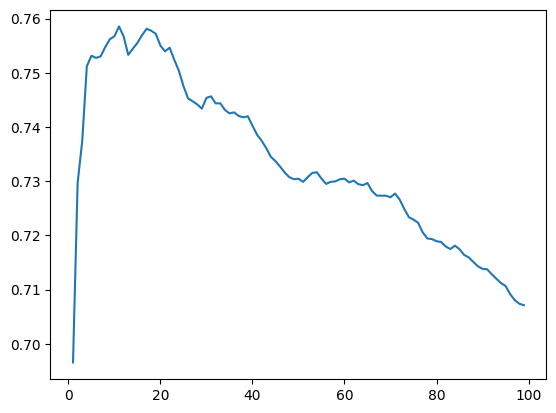

In [ ]:
sns.lineplot(x=range(1,max_K), y=cv_scores)

In [ ]:
# The index of the Max ROC AUC value
optimal_k_index = np.argmax(cv_scores)

# Retrieving the optimal k value and also adding 1 because k ranges from 1 to 100 and not from 0 to 100
optimal_k = optimal_k_index + 1

# Retrieving the maximum ROC AUC value
max_roc_auc = cv_scores[optimal_k_index]


print('Optimal k for maximum ROC AUC:', optimal_k)
print('Maximum ROC AUC:', max_roc_auc)

Optimal k for maximum ROC AUC: 11
Maximum ROC AUC: 0.7585472795363222


In [ ]:
# Optimized kNN model with k=11
knn = KNeighborsClassifier(n_neighbors=11, metric='euclidean')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1046   90]
 [ 234  100]]
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1136
           1       0.53      0.30      0.38       334

    accuracy                           0.78      1470
   macro avg       0.67      0.61      0.62      1470
weighted avg       0.75      0.78      0.76      1470



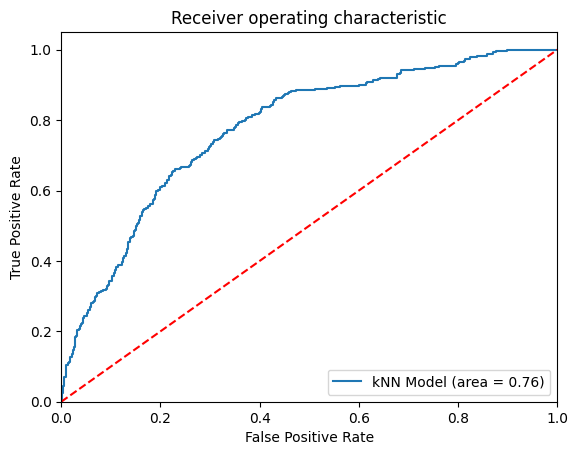

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

kNN_roc_auc = roc_auc_score(y_test, knn.predict_proba(X_test)[:,1])
knn_fpr, knn_tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='kNN Model (area = %0.2f)' % kNN_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
print('ROC AUC: ', roc_auc_score(y_test,y_pred))

ROC AUC:  0.6100879227460572


In [ ]:
#Random Forest
dt_model = tree.DecisionTreeClassifier(min_samples_leaf=5, max_depth=3)

dt_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

In [ ]:
y_pred = dt_model.predict(X_test)

In [ ]:
confusion_matrix(y_test,y_pred)

array([[1083,   53],
       [ 264,   70]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87      1136
           1       0.57      0.21      0.31       334

    accuracy                           0.78      1470
   macro avg       0.69      0.58      0.59      1470
weighted avg       0.75      0.78      0.74      1470



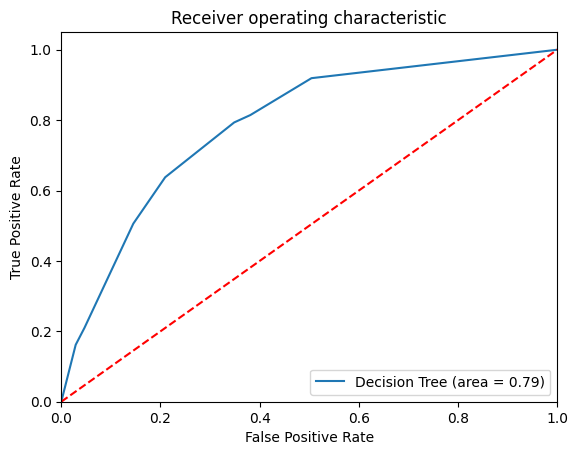

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

dt_roc_auc = roc_auc_score(y_test, dt_model.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, dt_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

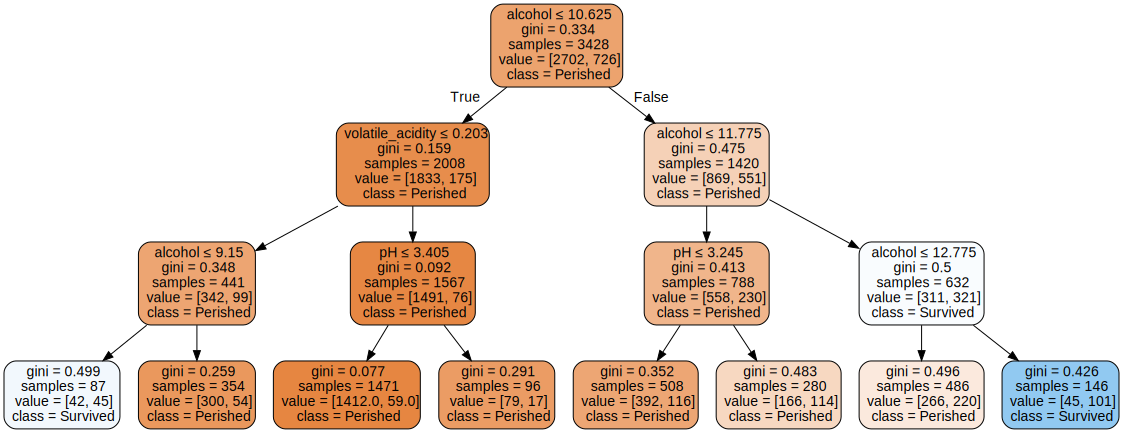

In [ ]:
import graphviz
dot_data = tree.export_graphviz(dt_model, out_file=None,
                      feature_names=X.columns,
                      class_names=['Perished','Survived'],
                      filled=True, rounded=True,
                      special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model  = RandomForestClassifier(max_depth=5, random_state=0)
rf_model.fit(X_train,y_train)

y_pred_rf = rf_model.predict(X_test)

confusion_matrix(y_test,y_pred_rf)

array([[1095,   41],
       [ 246,   88]])

In [ ]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88      1136
           1       0.68      0.26      0.38       334

    accuracy                           0.80      1470
   macro avg       0.75      0.61      0.63      1470
weighted avg       0.79      0.80      0.77      1470



In [ ]:
#Boosted Tree Model
from sklearn.ensemble import AdaBoostClassifier

bt_model = AdaBoostClassifier(n_estimators=100)

bt_model.fit(X_train,y_train)

y_pred_bt = bt_model.predict(X_test)

confusion_matrix(y_test,y_pred_bt)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


array([[1050,   86],
       [ 197,  137]])

In [ ]:
print(classification_report(y_test,y_pred_bt))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1136
           1       0.61      0.41      0.49       334

    accuracy                           0.81      1470
   macro avg       0.73      0.67      0.69      1470
weighted avg       0.79      0.81      0.79      1470



In [ ]:
print('ROC AUC: ', roc_auc_score(y_test,y_pred))

ROC AUC:  0.5814629543729443


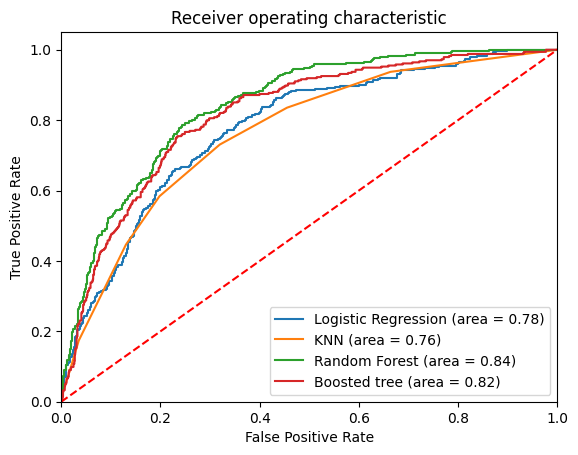

In [ ]:
#Combining the ROC AUC Curves
# Logistic Regression
logit_roc_auc = roc_auc_score(y_test, logmodel.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])

# kNN Model
kNN_roc_auc = roc_auc_score(y_test, knn.predict_proba(X_test)[:,1])
knn_fpr, knn_tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])


# Random Forest
rf_roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])

# Boosted Tree Model
bt_roc_auc = roc_auc_score(y_test, bt_model.predict_proba(X_test)[:,1])
bt_fpr, bt_tpr, bt_thresholds = roc_curve(y_test, bt_model.predict_proba(X_test)[:,1])




plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(knn_fpr, knn_tpr, label='KNN (area = %0.2f)' % kNN_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot(bt_fpr, bt_tpr, label='Boosted tree (area = %0.2f)' % bt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

**Precision:** The Random Forest model achieves the highest precision for classifying wines as good quality, with a score of 0.68. This indicates that when Random Forest labels a wine as good, it is more likely to be correct compared to other models, making it the most reliable model in terms of avoiding false positives.

**Recall:** The Boosted Tree model stands out with the highest recall score for good quality wines, reaching 0.41. This implies that it successfully identifies a higher proportion of actual good quality wines, although it may produce more false positives compared to Random Forest. Thus, it is more effective at capturing true positives.

**F1-Score:** For the balance between precision and recall, the Boosted Tree model again performs the best, with an F1-score of 0.49 for good quality wines. This highlights its ability to maintain a reasonable trade-off, making it a strong candidate if the goal is to optimize both identification and correctness of classification.

**ROC AUC:** The Random Forest leads with an AUC of 0.84, indicating superior discriminative power across the entire range of classification thresholds. It is followed by the Boosted Tree (AUC = 0.82), Logistic Regression (AUC = 0.78), and k-Nearest Neighbors (kNN) (AUC = 0.76). A higher AUC value signifies that Random Forest is the most capable at distinguishing between good and bad quality wines overall.


The Random Forest model emerges as the top performer in terms of overall classification capability, excelling in both precision and ROC AUC. However, the Boosted Tree model is noteworthy for its superior recall and F1-score, suggesting that it might be a better fit if the goal is to identify a larger number of good quality wines, even at the cost of increased false positives.